## Problem Statement 
You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.
You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:
1. Credit card / Prepaid card
2. Bank account services
3. Theft/Dispute reporting
4. Mortgages/loans
5. Others

With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

from tqdm.notebook import tqdm
tqdm.pandas()


## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [4]:
with open('complaints-2021-05-14_08_16.json') as data_file:    
    data = json.load(data_file)

## Data preparation

#### Inspecting the dataframe and it has 22 columns and 78313 rows

In [5]:
# Inspect the dataframe to understand the given data.
df=pd.json_normalize(data)
df

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78308,complaint-public-v2,complaint,3105617,0.0,None,08857,3105617,Closing an account,2018-12-20T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-21T12:00:00-05:00,None,Checking account,Yes,,Funds not received from closed account,Consent not provided
78309,complaint-public-v2,complaint,3091984,0.0,None,934XX,3091984,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,CA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided
78310,complaint-public-v2,complaint,3133355,0.0,None,923XX,3133355,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-01-25T12:00:00-05:00,None,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided
78311,complaint-public-v2,complaint,3110963,0.0,None,None,3110963,"Other features, terms, or problems",2018-12-27T12:00:00-05:00,PA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer,Consent provided


#### printing the column names

In [6]:
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [8]:
#Assign new column names
df.rename(columns={'_index':'index',
  '_type':'type',
  '_id':'id',
  '_score':'score',
  '_source.tags':'tags',
  '_source.zip_code':'',
 '_source.complaint_id':'complaint_id',
 '_source.issue':'issue',
 '_source.date_received':'date_received',
 '_source.state':'state',
 '_source.consumer_disputed':'consumer_disputed',
 '_source.product':'product',
 '_source.company_response':'company_response',
 '_source.company':'company',
 '_source.submitted_via':'submitted_via',
 '_source.date_sent_to_company':'date_sent_to_company',
 '_source.company_public_response':'company_public_response',
 '_source.sub_product':'sub_product',
 '_source.timely':'timely',
 '_source.complaint_what_happened':'complaint_what_happened',
 '_source.sub_issue':'sub_issue',
 '_source.consumer_consent_provided':'consumer_consent_provided'},inplace=True)

#### our notes - checking for NaN using complaint_id and issue columns

In [9]:
#Assign nan in place of blanks in the complaints column
df[['complaint_what_happened','issue']].replace('', np.nan, inplace=True)

/tmp/ipykernel_36297/1984297707.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
# Null values count after replacing blanks with nan
df[['complaint_what_happened','issue']].isnull().sum()

complaint_what_happened    0
issue                      0
dtype: int64

In [11]:
#Remove all rows where complaint_what_happened column is nan
df.dropna(subset=['complaint_what_happened'],inplace=True)

#### Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers

#### our notes - taking only those columns that has text as data 

In [12]:
# List of columns to preprocess (manually selected based on inspection)
text_columns = [
    'tags', 'issue', 'consumer_disputed', 'product', 
    'company_response', 'company', 'submitted_via', 
    'company_public_response', 'sub_product', 'complaint_what_happened', 
    'sub_issue', 'consumer_consent_provided'
]

In [13]:
# defining a function for text preprocessing

def pre_process_text(text):
    text=text.lower()  #convert to lower case
    text=re.sub(r'^\[[\w\s]\]+$',' ',text) #Remove text in square brackets
    text=re.sub(r'[^\w\s]',' ',text) #Remove punctuation
    text=re.sub(r'^[a-zA-Z]\d+\w*$',' ',text) #Remove words with numbers
    return text


#### Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].

In [15]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mayur/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/mayur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### define a function for text preprocessing, lemmatization, and POS filtering

In [17]:

#Write your function to Lemmatize the texts
stopwords = nlp.Defaults.stop_words
def lemmatization(texts):
    lemma_sentences = []
    for doc in tqdm(nlp.pipe(texts)):
        sent = [token.lemma_ for token in doc if token.text not in set(stopwords)]
        lemma_sentences.append(' '.join(sent))
    return lemma_sentences

In [19]:
# create new df which will have only complaint and lemmatized complaint
df_clean = pd.DataFrame()


In [20]:
# clean the columne contained text
df_clean['complaint_what_happened'] = df['complaint_what_happened'].progress_apply(lambda x: pre_process_text(x))

  0%|          | 0/78313 [00:00<?, ?it/s]

In [21]:
# lemmitize the text columns
df_clean['complaint_what_happened_lemmatized'] = lemmatization(df_clean['complaint_what_happened'])

0it [00:00, ?it/s]

In [22]:
# adding category and sub_category columns to the dataframe for better topic identification
df_clean['category'] = df['product']
df_clean['sub_category'] = df['sub_product']

#### our notes - function to extract POS tags and remove words with tags other than 'NN'

In [23]:


def extract_pos_tags(texts):
    pos_sentences = []
    for doc in tqdm(nlp.pipe(texts)):
        sent = [token.text for token in doc if token.tag_ == 'NN']
        pos_sentences.append(' '.join(sent))
    return pos_sentences


#### apply the POS tag filter function

In [24]:

df_clean["complaint_POS_removed"] = extract_pos_tags(df_clean['complaint_what_happened_lemmatized'])
print(df_clean)             # verify the changes

0it [00:00, ?it/s]

                                 complaint_what_happened  \
0                                                          
1      good morning my name is xxxx xxxx and i apprec...   
2      i upgraded my xxxx xxxx card in xx xx 2018 and...   
3                                                          
4                                                          
...                                                  ...   
78308                                                      
78309  on wednesday  xx xx xxxx i called chas  my xxx...   
78310  i am not familiar with xxxx pay and did not un...   
78311  i have had flawless credit for 30 yrs  i ve ha...   
78312  roughly 10  years ago i closed out my accounts...   

                      complaint_what_happened_lemmatized  \
0                                                          
1      good morning xxxx xxxx appreciate help stop ch...   
2      upgrade xxxx xxxx card xx xx 2018 tell agent u...   
3                                      

In [25]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed
0,,,Debt collection,Credit card debt,
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection,Credit card debt,morning help bank service write chase debt ver...
2,i upgraded my xxxx xxxx card in xx xx 2018 and...,upgrade xxxx xxxx card xx xx 2018 tell agent u...,Credit card or prepaid card,General-purpose credit card or charge card,card agent upgrade anniversary date change age...
3,,,Mortgage,Conventional home mortgage,
4,,,Credit card or prepaid card,General-purpose credit card or charge card,
...,...,...,...,...,...
78308,,,Checking or savings account,Checking account,
78309,on wednesday xx xx xxxx i called chas my xxx...,wednesday xx xx xxxx call chas xxxx xxxx v...,Credit card or prepaid card,General-purpose credit card or charge card,credit card provider claim purchase protection...
78310,i am not familiar with xxxx pay and did not un...,familiar xxxx pay understand great risk provid...,Checking or savings account,Checking account,xxxx risk consumer chase year trust mobile ban...
78311,i have had flawless credit for 30 yrs i ve ha...,flawless credit 30 yrs ve chase credit card ...,Credit card or prepaid card,General-purpose credit card or charge card,credit yrs credit card chase freedom xxxx prob...


## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [26]:
# Write your code here to visualise the data according to the 'Complaint' character length
df_clean['complaint_length'] = df_clean['complaint_what_happened'].str.len()
df_clean['complaint_what_happened_lemmatized_length'] = df_clean['complaint_what_happened_lemmatized'].str.len()
df_clean['complaint_POS_removed_length'] = df_clean['complaint_POS_removed'].str.len()

fig = go.Figure()
fig.add_trace(go.Histogram(x=df_clean['complaint_length'], name='Complaint'))
fig.add_trace(go.Histogram(x=df_clean['complaint_what_happened_lemmatized_length'], name='Complaint Lemmatized'))
fig.add_trace(go.Histogram(x=df_clean['complaint_POS_removed_length'], name='Complaint POS Removed'))
fig.update_layout(barmode='overlay', title='Complaint Character Length', xaxis_title='Character Length', yaxis_title='Count')
fig.update_traces(opacity=0.75)
fig.show()

/home/mayur/anaconda3/lib/python3.11/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



/home/mayur/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



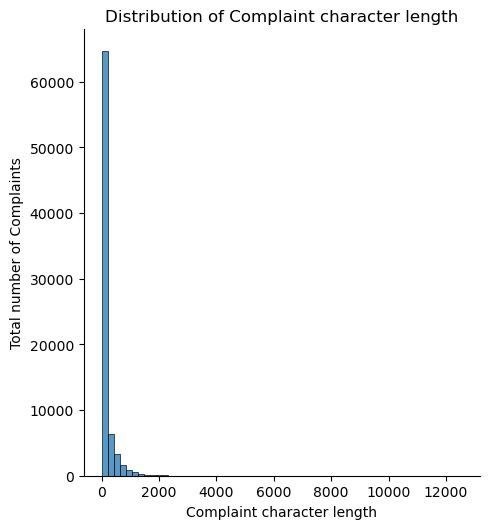

In [27]:
char_len = [len(each_sent) for each_sent in df_clean['complaint_POS_removed']]


sns.displot(char_len, kind='hist', bins=60)
plt.xlabel("Complaint character length")
plt.ylabel("Total number of Complaints")
plt.title("Distribution of Complaint character length")
plt.show()

#### Find the top 40 words by frequency among all the articles after processing the text.

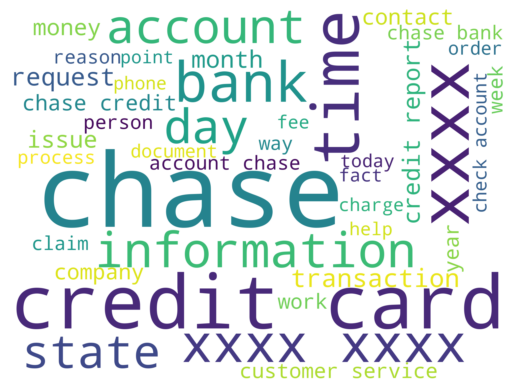

In [28]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
stopwords = nlp.Defaults.stop_words
wordcloud=WordCloud(stopwords=stopwords, background_color='white', width=2000, height=1500,max_words=40).generate(' '.join(df_clean['complaint_POS_removed']))
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()

In [29]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [30]:
# function to get the specified top n-grams
def get_top_n_words(corpus, n=None,count=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:count]

In [31]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 

unigram = get_top_n_words(df_clean['Complaint_clean'], 1,30)
for word, freq in unigram:
    print(word, freq)
px.bar(x=[word for word, freq in unigram], y=[freq for word, freq in unigram], title='Top30 Unigrams')

chase 58460
xxxx 52900
account 43065
credit 33912
card 30137
payment 21329
bank 19978
time 16233
charge 15387
day 13243
call 12225
money 11908
check 11229
loan 10671
report 10661
information 9605
letter 9468
state 9001
fee 8965
number 8656
month 8608
year 8428
contact 8151
customer 8139
transaction 8104
mortgage 7934
dispute 7852
pay 7754
service 7687
balance 7674


In [32]:
#Print the top 10 words in the unigram frequency
unigram = get_top_n_words(df_clean['Complaint_clean'], 1,10)
for word, freq in unigram:
    print(word, freq)
px.bar(x=[word for word, freq in unigram], y=[freq for word, freq in unigram], title='Top 10 Unigrams')

chase 58460
xxxx 52900
account 43065
credit 33912
card 30137
payment 21329
bank 19978
time 16233
charge 15387
day 13243


In [33]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
bigram = get_top_n_words(df_clean['Complaint_clean'], 2,30)
for word, freq in bigram:
    print(word, freq)
px.bar(x=[word for word, freq in bigram], y=[freq for word, freq in bigram], title='Top 30 Bigrams')

credit card 12862
xxxx xxxx 6127
credit report 3927
chase credit 3170
customer service 3004
call chase 2956
chase bank 2579
account chase 2507
check account 2349
chase account 2114
contact chase 2073
xxxx chase 1950
debit card 1923
account xxxx 1871
bank account 1855
xxxx credit 1819
number xxxx 1765
credit score 1715
account account 1669
xxxx payment 1641
chase card 1625
payment xxxx 1558
card account 1528
card chase 1513
card xxxx 1328
interest rate 1300
chase xxxx 1290
phone number 1244
letter chase 1239
business day 1231


In [34]:
#Print the top 10 words in the bigram frequency
bigram = get_top_n_words(df_clean['Complaint_clean'], 2,10)
for word, freq in bigram:
    print(word, freq)
fig1=px.bar(x=[word for word, freq in bigram], y=[freq for word, freq in bigram], title='Top 10 Bigrams')
fig1.show()

credit card 12862
xxxx xxxx 6127
credit report 3927
chase credit 3170
customer service 3004
call chase 2956
chase bank 2579
account chase 2507
check account 2349
chase account 2114


In [35]:
#Print the top 30 words in the trigram frequency and plot the same using a bar graph
trigram = get_top_n_words(df_clean['Complaint_clean'], 3,30)
for word, freq in trigram:
    print(word, freq)

chase credit card 2275
xxxx xxxx xxxx 1713
credit card account 1061
credit card company 977
xxxx credit card 825
credit card chase 762
chase customer service 579
credit card xxxx 550
inquiry credit report 472
credit card credit 411
charge credit card 397
credit reporting agency 387
account credit card 345
call customer service 328
credit reporting act 312
customer service representative 302
credit report credit 302
card credit card 301
chase checking account 296
credit card payment 291
chase auto finance 290
credit card charge 288
payment xxxx payment 284
chase card service 283
account number xxxx 283
bank credit card 261
xxxx payment xxxx 255
account call chase 245
credit card balance 240
victim identity theft 235


In [36]:
#Print the top 10 words in the trigram frequency and plot the same using a bar graph
trigram = get_top_n_words(df_clean['Complaint_clean'], 3,10)
for word, freq in trigram:
    print(word, freq)
        
fig1=px.bar(x=[word for word, freq in trigram], y=[freq for word, freq in trigram], title='Top 10 Trigrams')
fig1.show()

chase credit card 2275
xxxx xxxx xxxx 1713
credit card account 1061
credit card company 977
xxxx credit card 825
credit card chase 762
chase customer service 579
credit card xxxx 550
inquiry credit report 472
credit card credit 411


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [37]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [38]:
df_clean

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,complaint_length,complaint_what_happened_lemmatized_length,complaint_POS_removed_length,Complaint_clean
0,,,Debt collection,Credit card debt,,0,0,0,
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection,Credit card debt,morning help bank service write chase debt ver...,486,311,153,morning help bank service write chase debt ver...
2,i upgraded my xxxx xxxx card in xx xx 2018 and...,upgrade xxxx xxxx card xx xx 2018 tell agent u...,Credit card or prepaid card,General-purpose credit card or charge card,card agent upgrade anniversary date change age...,355,229,123,card agent upgrade anniversary date change age...
3,,,Mortgage,Conventional home mortgage,,0,0,0,
4,,,Credit card or prepaid card,General-purpose credit card or charge card,,0,0,0,
...,...,...,...,...,...,...,...,...,...
78308,,,Checking or savings account,Checking account,,0,0,0,
78309,on wednesday xx xx xxxx i called chas my xxx...,wednesday xx xx xxxx call chas xxxx xxxx v...,Credit card or prepaid card,General-purpose credit card or charge card,credit card provider claim purchase protection...,2114,1237,707,credit card provider claim purchase protection...
78310,i am not familiar with xxxx pay and did not un...,familiar xxxx pay understand great risk provid...,Checking or savings account,Checking account,xxxx risk consumer chase year trust mobile ban...,2319,1382,704,risk consumer chase year trust mobile banking...
78311,i have had flawless credit for 30 yrs i ve ha...,flawless credit 30 yrs ve chase credit card ...,Credit card or prepaid card,General-purpose credit card or charge card,credit yrs credit card chase freedom xxxx prob...,2171,1355,520,credit yrs credit card chase freedom problem ...


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [39]:
#to initialise the TfidfVectorizer 
tf_idf_vec=TfidfVectorizer(max_df=0.98,min_df=2,stop_words='english')


In [40]:
tf_idf_vec

TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')

In [41]:
df_clean.shape

(78313, 9)

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [42]:
#to create the document term matrix by transforming the complaints column present in df_clean.
tfidf=tf_idf_vec.fit_transform(df_clean['Complaint_clean'])

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [43]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [44]:
# nmf_model with the n_components i.e 5
num_topics = 5

nmf_model = NMF(n_components=num_topics, random_state=40)

In [45]:
nmf_model.fit(tfidf)
len(tf_idf_vec.get_feature_names_out())

6257

In [46]:
# print the top 15 words for each of the topics
for index, topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index} with tf-idf score')
    print([tf_idf_vec.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0 with tf-idf score
['reason', 'transaction', 'number', 'balance', 'business', 'transfer', 'fee', 'branch', 'day', 'fund', 'deposit', 'money', 'check', 'bank', 'account']


THE TOP 15 WORDS FOR TOPIC #1 with tf-idf score
['limit', 'statement', 'point', 'company', 'service', 'year', 'pay', 'month', 'purchase', 'chase', 'fee', 'balance', 'charge', 'credit', 'card']


THE TOP 15 WORDS FOR TOPIC #2 with tf-idf score
['bank', 'statement', 'rate', 'fee', 'home', 'balance', 'modification', 'year', 'time', 'chase', 'pay', 'month', 'mortgage', 'loan', 'payment']


THE TOP 15 WORDS FOR TOPIC #3 with tf-idf score
['agency', 'theft', 'remove', 'identity', 'letter', 'file', 'reporting', 'score', 'debt', 'company', 'account', 'information', 'inquiry', 'report', 'credit']


THE TOP 15 WORDS FOR TOPIC #4 with tf-idf score
['service', 'number', 'phone', 'fraud', 'state', 'information', 'email', 'time', 'contact', 'transaction', 'claim', 'letter', 'dispute', 'charge', 'chase'

In [47]:
# creating the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_values = nmf_model.transform(tfidf)
topic_values.argmax(axis=1)

array([0, 4, 1, ..., 4, 2, 2])

In [48]:
df_clean.shape

(78313, 9)

In [49]:
# assigning the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = topic_values.argmax(axis=1)

In [50]:
df_clean.head()

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,complaint_length,complaint_what_happened_lemmatized_length,complaint_POS_removed_length,Complaint_clean,Topic
0,,,Debt collection,Credit card debt,,0,0,0,,0
1,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,Debt collection,Credit card debt,morning help bank service write chase debt ver...,486,311,153,morning help bank service write chase debt ver...,4
2,i upgraded my xxxx xxxx card in xx xx 2018 and...,upgrade xxxx xxxx card xx xx 2018 tell agent u...,Credit card or prepaid card,General-purpose credit card or charge card,card agent upgrade anniversary date change age...,355,229,123,card agent upgrade anniversary date change age...,1
3,,,Mortgage,Conventional home mortgage,,0,0,0,,0
4,,,Credit card or prepaid card,General-purpose credit card or charge card,,0,0,0,,0


In [51]:
#Print the first 5 Complaint for each of the Topics


df_clean.groupby('Topic').head(5).sort_values(by='Topic')

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,complaint_length,complaint_what_happened_lemmatized_length,complaint_POS_removed_length,Complaint_clean,Topic
0,,,Debt collection,Credit card debt,,0,0,0,,0
3,,,Mortgage,Conventional home mortgage,,0,0,0,,0
4,,,Credit card or prepaid card,General-purpose credit card or charge card,,0,0,0,,0
5,,,Checking or savings account,Checking account,,0,0,0,,0
6,,,Checking or savings account,Checking account,,0,0,0,,0
2,i upgraded my xxxx xxxx card in xx xx 2018 and...,upgrade xxxx xxxx card xx xx 2018 tell agent u...,Credit card or prepaid card,General-purpose credit card or charge card,card agent upgrade anniversary date change age...,355,229,123,card agent upgrade anniversary date change age...,1
52,my roommate was stealing my chase debit card a...,roommate steal chase debit card driver license...,Checking or savings account,Checking account,roommate chase debit card driver license money...,843,556,210,roommate chase debit card driver license money...,1
50,i am a senior citizen that has been scammed by...,senior citizen scamme company xxxx xxxx pay ...,Credit card or prepaid card,General-purpose credit card or charge card,citizen time share company refund credit card ...,350,153,65,citizen time share company refund credit card ...,1
40,xxxx xxxx a sofa love seat table and chairs ...,xxxx xxxx sofa love seat table chair deliv...,Checking or savings account,Checking account,love seat table chair debit card charge bank v...,165,125,71,love seat table chair debit card charge bank v...,1
32,my chase amazon card was declined for a cateri...,chase amazon card decline catering order place...,Credit card or prepaid card,General-purpose credit card or charge card,catering order place contact chase noon today ...,1972,1125,573,catering order place contact chase noon today ...,1


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [52]:
#Create the dictionary of Topic names and Topics
Topic_names = {  
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Theft/Dispute Reporting',
    3: 'Mortgage/Loan',
    4: 'Others'
}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [53]:
df_clean.shape

(78313, 10)

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [54]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean[['complaint_what_happened','Topic']]

In [55]:
training_data.head(10)

,complaint_what_happened,Topic
0,,Bank Account services
1,good morning my name is xxxx xxxx and i apprec...,Others
2,i upgraded my xxxx xxxx card in xx xx 2018 and...,Credit card or prepaid card
3,,Bank Account services
4,,Bank Account services
5,,Bank Account services
6,,Bank Account services
7,,Bank Account services
8,,Bank Account services
9,,Bank Account services


In [56]:
training_data.shape

(78313, 2)

#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

#### Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [71]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [60]:
count_vect=CountVectorizer()
#Write your code to get the Vector count
X_train_counts=count_vect.fit_transform(training_data['complaint_what_happened'])
#Write your code here to transform the word vector to tf-idf
tfidf_transformer=TfidfTransformer()
X_train_tf=tfidf_transformer.fit_transform(X_train_counts)

In [62]:
# Splitting the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X_train_tf, training_data['Topic'], test_size=0.2, random_state=40)

In [63]:
# function to evaluate the model and display the results
def eval_model(y_test,y_pred,y_pred_proba,type='Training'):
    print(type,'results')
    print('Accuracy: ', accuracy_score(y_test,y_pred).round(2))
    print('Precision: ', precision_score(y_test,y_pred,average='weighted').round(2))
    print('Recall: ', recall_score(y_test,y_pred,average='weighted').round(2))
    print('F1 Score: ', f1_score(y_test,y_pred,average='weighted').round(2))
    print('ROC AUC Score: ', roc_auc_score(y_test,y_pred_proba,average='weighted',multi_class='ovr').round(2))
    print('Classification Report: ', classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=training_data['Topic'].unique())
    disp.plot()

In [64]:
# run model with grid search
def run_model(model,param_grid):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=40)
    grid=GridSearchCV(model,param_grid={},cv=cv,scoring='f1_weighted',verbose=1,n_jobs=-1)
    grid.fit(train_X,train_y)
    return grid.best_estimator_

#### 1.  Decision Tree

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training results
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
ROC AUC Score:  1.0
Classification Report:                               precision    recall  f1-score   support

      Bank Account services       1.00      1.00      1.00     49588
Credit card or prepaid card       1.00      1.00      1.00      3284
              Mortgage/Loan       1.00      1.00      1.00      2165
                     Others       1.00      1.00      1.00      4167
    Theft/Dispute Reporting       1.00      1.00      1.00      3446

                   accuracy                           1.00     62650
                  macro avg       1.00      1.00      1.00     62650
               weighted avg       1.00      1.00      1.00     62650

Test results
Accuracy:  0.93
Precision:  0.93
Recall:  0.93
F1 Score:  0.93
ROC AUC Score:  0.93
Classification Report:                               precision    recall  f1-score   support

      

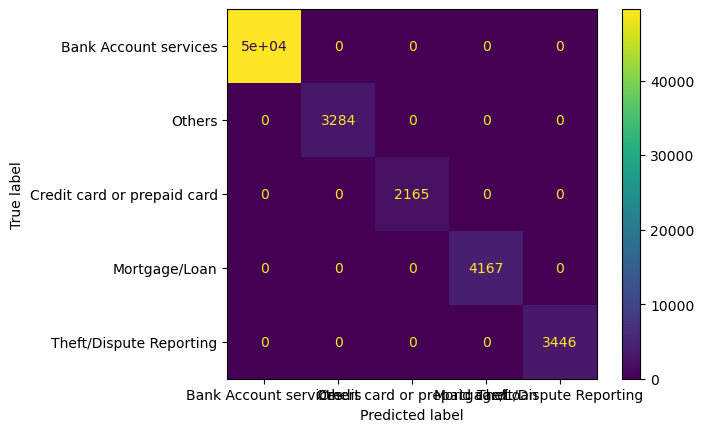

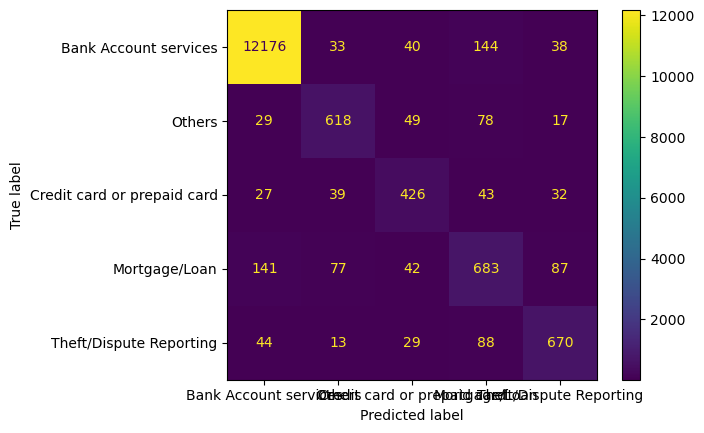

In [65]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}
model=run_model(DecisionTreeClassifier(),params)
eval_model(train_y,model.predict(train_X),model.predict_proba(train_X),type='Training')
eval_model(test_y,model.predict(test_X),model.predict_proba(test_X),type='Test')

#### 2. Logistick Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/mayur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mayur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Training results
Accuracy:  0.98
Precision:  0.98
Recall:  0.98
F1 Score:  0.98
ROC AUC Score:  1.0
Classification Report:                               precision    recall  f1-score   support

      Bank Account services       0.99      0.99      0.99     49588
Credit card or prepaid card       0.96      0.94      0.95      3284
              Mortgage/Loan       0.96      0.88      0.92      2165
                     Others       0.90      0.89      0.90      4167
    Theft/Dispute Reporting       0.96      0.93      0.94      3446

                   accuracy                           0.98     62650
                  macro avg       0.95      0.93      0.94     62650
               weighted avg       0.98      0.98      0.98     62650

Test results
Accuracy:  0.96
Precision:  0.96
Recall:  0.96
F1 Score:  0.96
ROC AUC Score:  1.0
Classification Report:                               precision    recall  f1-score   support

      Bank Account services       0.98      0.99      0.99    

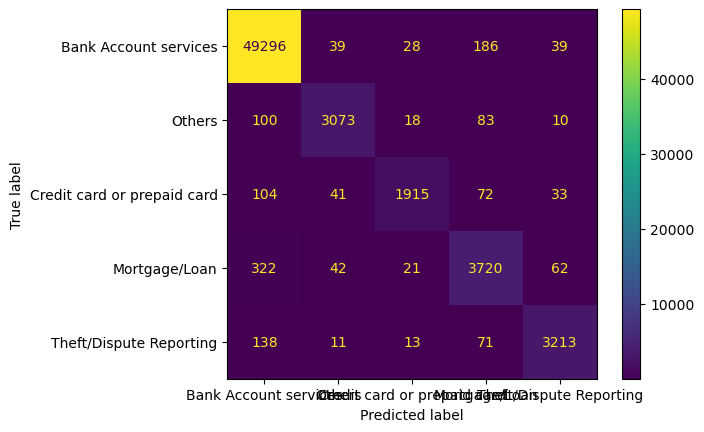

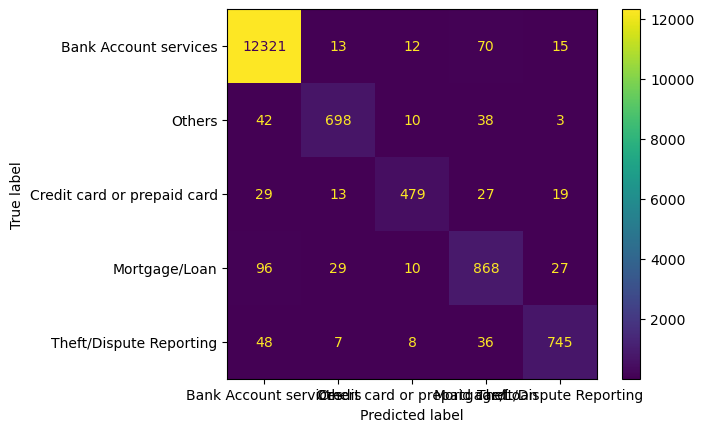

In [69]:
#running and evaluating the Logistic Regression model
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500, 1000],
    'class_weight': [None, 'balanced']
}
model=run_model(LogisticRegression(),params)
eval_model(train_y,model.predict(train_X),model.predict_proba(train_X),type='Training')
eval_model(test_y,model.predict(test_X),model.predict_proba(test_X),type='Test')

#### 3. Random Forest

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training results
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
ROC AUC Score:  1.0
Classification Report:                               precision    recall  f1-score   support

      Bank Account services       1.00      1.00      1.00     49588
Credit card or prepaid card       1.00      1.00      1.00      3284
              Mortgage/Loan       1.00      1.00      1.00      2165
                     Others       1.00      1.00      1.00      4167
    Theft/Dispute Reporting       1.00      1.00      1.00      3446

                   accuracy                           1.00     62650
                  macro avg       1.00      1.00      1.00     62650
               weighted avg       1.00      1.00      1.00     62650

Test results
Accuracy:  0.94
Precision:  0.93
Recall:  0.94
F1 Score:  0.93
ROC AUC Score:  0.99
Classification Report:                               precision    recall  f1-score   support

      

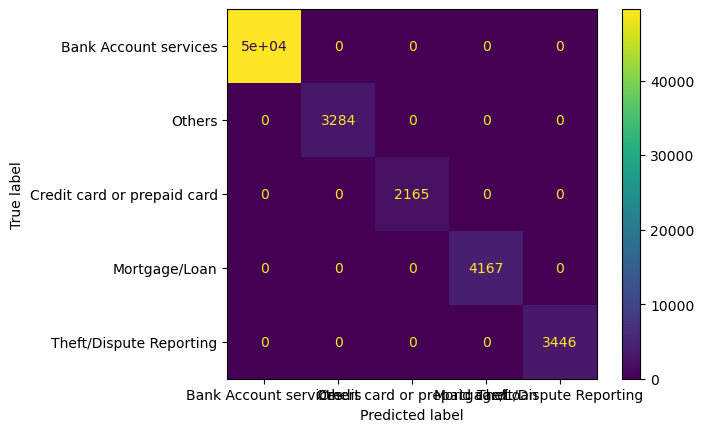

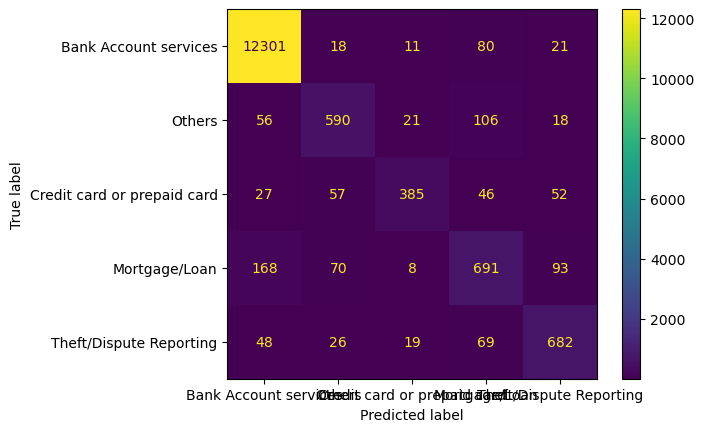

In [72]:
#running and evaluating the Random Forest model
params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
model=run_model(RandomForestClassifier(),params)
eval_model(train_y,model.predict(train_X),model.predict_proba(train_X),type='Training')
eval_model(test_y,model.predict(test_X),model.predict_proba(test_X),type='Test')

#### Decision Tree evaluating Test data

# Final Results

| Model | Accuracy | Precision | Recall | F1 Score | ROC AUC Score |
|-------|----------|-----------|--------|---------|--------------|
| Logistic Regression | 0.96 | 0.96 | 0.96 | 0.96 | 1.00 |
| DecisionTreeClassifier | 0.93 | 0.93 | 0.93 | 0.93 | 0.93 |
| RandomForestClassifier | 0.94 | 0.93 | 0.94 | 0.93 | 0.99 |


# Conclusion
Based on the provided metrics, **Logistic Regression** appears to be the best model for your NLP case study:

**Highest Accuracy**: Indicates it correctly classifies the most instances.

**Highest Precision and Recall**: Suggests it has a good balance between positive prediction quality and completeness.

**Highest F1 Score:** Implies it effectively balances precision and recall.

**Perfect ROC AUC Score:** Shows it has an excellent ability to distinguish between classes.
